# Trading Strategies powered by Machine Learning - Classification

## Logistic Regression with scikit-learn - a simple Introduction (Part 1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [3]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [4]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]) 

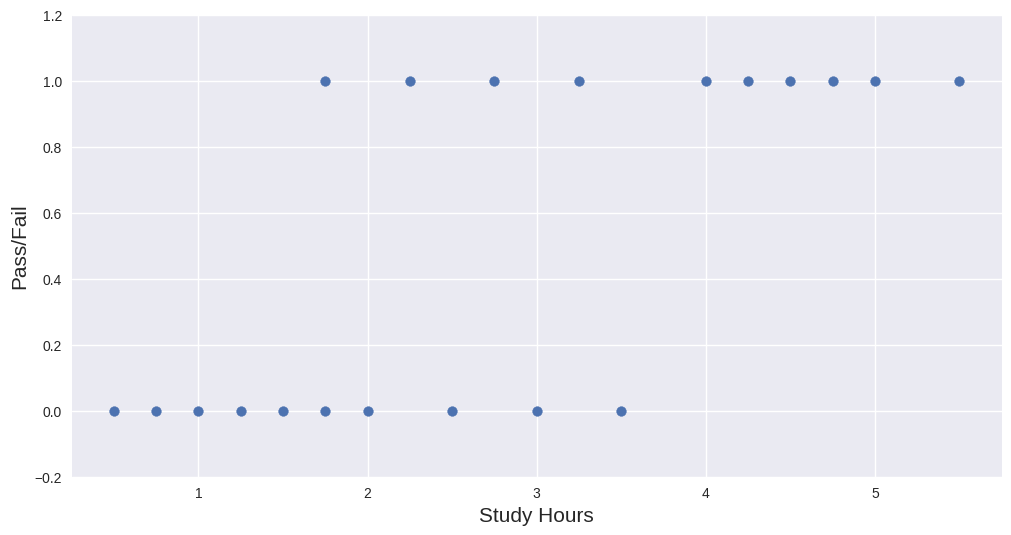

In [5]:
plt.figure(figsize=(12, 6))
plt.scatter(hours, success)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.ylim(-0.2, 1.2)
plt.show()

In [6]:
data = pd.DataFrame({'hours': hours, 'success': success})

In [7]:
data

,hours,success
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lm = LinearRegression(fit_intercept= True)

In [10]:
lm.fit(data.hours.to_frame(), data.success)

LinearRegression()

In [11]:
lm.coef_

array([0.23459561])

In [12]:
lm.intercept_

-0.15393526898848742

In [13]:
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


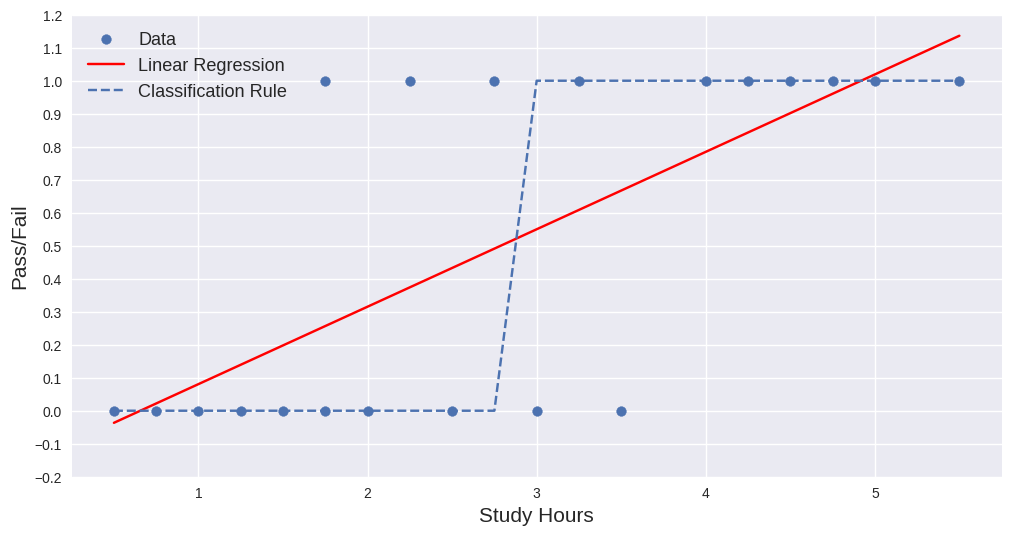

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Linear Regression")
plt.plot(data.hours, np.where(data.pred > 0.5, 1, 0), linestyle = "--", label = "Classification Rule")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

## Logistic Regression with scikit-learn - a simple Introduction (Part 2)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lm = LogisticRegression()

In [17]:
data

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


In [18]:
lm.fit(data.hours.to_frame(), data.success)

LogisticRegression()

In [19]:
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


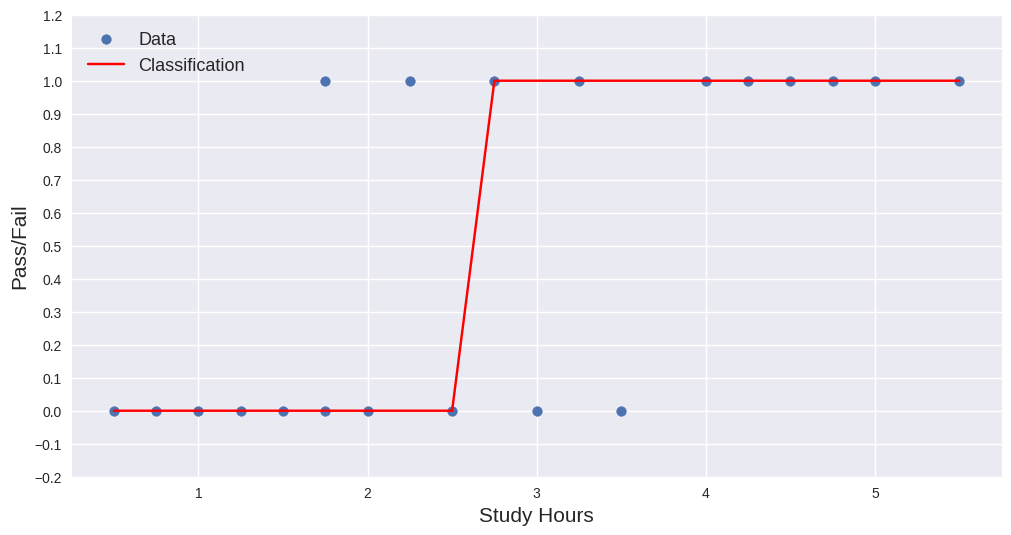

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

In [21]:
proba = lm.predict_proba(data.hours.to_frame())
proba

array([[0.92861721, 0.07138279],
       [0.90707537, 0.09292463],
       [0.87987361, 0.12012639],
       [0.84606045, 0.15393955],
       [0.80484065, 0.19515935],
       [0.75576968, 0.24423032],
       [0.75576968, 0.24423032],
       [0.69897507, 0.30102493],
       [0.63534559, 0.36465441],
       [0.56660579, 0.43339421],
       [0.49520342, 0.50479658],
       [0.42399618, 0.57600382],
       [0.35581092, 0.64418908],
       [0.2930129 , 0.7069871 ],
       [0.18920231, 0.81079769],
       [0.14900776, 0.85099224],
       [0.11612919, 0.88387081],
       [0.08974025, 0.91025975],
       [0.06888056, 0.93111944],
       [0.03998596, 0.96001404]])

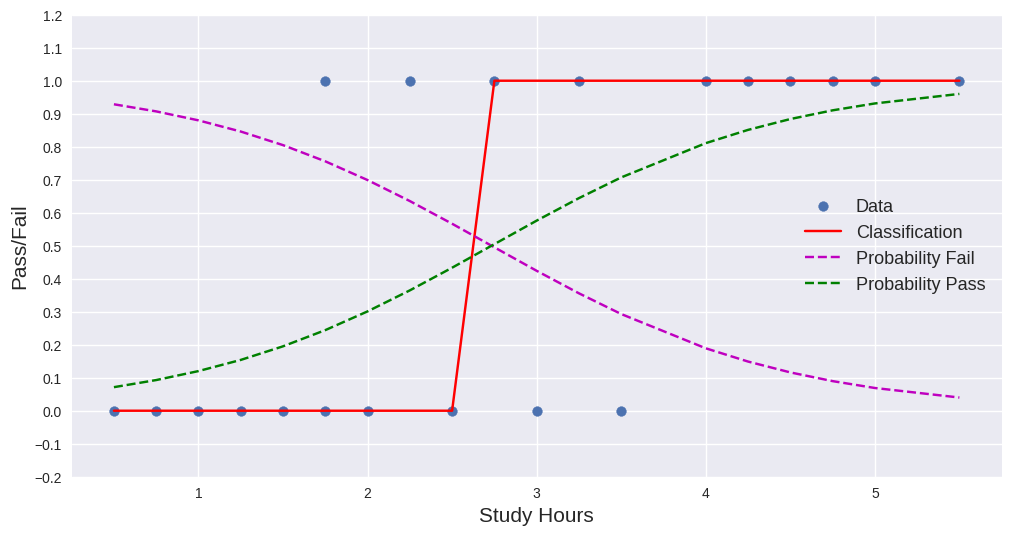

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.plot(data.hours, proba[:, 0], "m--", label = "Probability Fail")
plt.plot(data.hours, proba[:, 1], "g--", label = "Probability Pass")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()

## Getting and Preparing the Data

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [24]:
data = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")

In [25]:
data["returns"] = np.log(data.div(data.shift(1)))

In [26]:
data.dropna(inplace = True)

In [27]:
data["direction"] = np.sign(data.returns)

In [28]:
data

,price,returns,direction
time,,,
2019-01-01 22:05:00+00:00,1.146350,-0.000201,-1.0
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-1.0
2019-01-01 22:15:00+00:00,1.146320,0.000000,0.0
2019-01-01 22:20:00+00:00,1.146530,0.000183,1.0
2019-01-01 22:25:00+00:00,1.146475,-0.000048,-1.0
...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0


In [29]:
data.direction.value_counts()

direction
 1.0    36058
-1.0    35702
 0.0     1959
Name: count, dtype: int64

In [30]:
lags = 5

In [31]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [32]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.000048,0.000183,0.000000,-0.000026,-0.000201
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.000017,-0.000048,0.000183,0.000000,-0.000026
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.000000,-0.000017,-0.000048,0.000183,0.000000
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.000074,0.000000,-0.000017,-0.000048,0.000183
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.000048,-0.000074,0.000000,-0.000017,-0.000048
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018,0.000022,-0.000004,0.000089
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112,-0.000018,0.000022,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004,-0.000112,-0.000018,0.000022


++++++++++++++++++++++++++++++++

__Scaling/Standardizing Features (new)__

__Goal__: Scale all lags in a way that __the mean becomes 0__ and the __standard deviation becomes 1__

In [33]:
means = data[cols].mean()
means

lag1   -3.142659e-07
lag2   -3.115388e-07
lag3   -3.125681e-07
lag4   -3.132864e-07
lag5   -3.159474e-07
dtype: float64

In [34]:
stand_devs = data[cols].std()
stand_devs

lag1    0.000199
lag2    0.000199
lag3    0.000199
lag4    0.000199
lag5    0.000199
dtype: float64

In [35]:
data[cols] = (data[cols]-means) / stand_devs
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.240031,0.924152,0.001574,-0.130230,-1.008816
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.086280,-0.240044,0.924158,0.001578,-0.130216
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.001583,-0.086293,-0.240039,0.924162,0.001591
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.371850,0.001569,-0.086288,-0.240035,0.924169
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.240065,-0.371862,0.001574,-0.086284,-0.240020
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.560410,-0.088343,0.113965,-0.020901,0.451175
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.020898,-0.560420,-0.088338,0.113969,-0.020887
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.136467,-0.020912,-0.560415,-0.088335,0.113981


In [36]:
data[cols].mean() # zero mean (very close)

lag1    9.446399e-18
lag2    1.735053e-18
lag3   -1.195259e-17
lag4    3.662890e-18
lag5   -1.195259e-17
dtype: float64

In [37]:
data[cols].std() # standard_dev of 1

lag1    1.0
lag2    1.0
lag3    1.0
lag4    1.0
lag5    1.0
dtype: float64

+++++++++++++++++++++++++++++++++

## Predicting Market Direction with Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier # added (from sklearn v. 1.7)

In [39]:
# lm = LogisticRegression(C = 1e6, max_iter = 100000, multi_class = "ovr") # old

In [40]:
lm = OneVsRestClassifier(LogisticRegression(C = 1e6, max_iter = 100000)) # new (from sklearn v. 1.7)

In [41]:
lm.fit(data[cols], data.direction)

OneVsRestClassifier(estimator=LogisticRegression(C=1000000.0, max_iter=100000))

In [42]:
data["pred"] = lm.predict(data[cols])

In [43]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.240031,0.924152,0.001574,-0.130230,-1.008816,1.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.086280,-0.240044,0.924158,0.001578,-0.130216,1.0
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.001583,-0.086293,-0.240039,0.924162,0.001591,-1.0
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.371850,0.001569,-0.086288,-0.240035,0.924169,1.0
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.240065,-0.371862,0.001574,-0.086284,-0.240020,1.0
...,...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.560410,-0.088343,0.113965,-0.020901,0.451175,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.020898,-0.560420,-0.088338,0.113969,-0.020887,1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.136467,-0.020912,-0.560415,-0.088335,0.113981,1.0


In [44]:
data.pred.value_counts()

pred
 1.0    41414
-1.0    32300
Name: count, dtype: int64

In [45]:
hits = np.sign(data.direction * data.pred).value_counts()

In [46]:
hits

 1.0    37636
-1.0    34120
 0.0     1958
Name: count, dtype: int64

In [47]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5105678704181024

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_true = data.direction, y_pred = data.pred)

0.5105678704181024

## In-Sample Backtesting and the Look-ahead-bias

In [80]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred,strategy,creturns,cstrategy,trades
time,,,,,,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.110687,0.360840,0.944784,0.001578,-0.335287,1.0,0.000004,1.000004,1.000004,0.0
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.024037,-0.110700,0.360846,0.944788,0.001591,-1.0,-0.000031,1.000036,0.999973,2.0
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.158760,0.024023,-0.110695,0.360850,0.944795,-1.0,0.000004,1.000031,0.999978,0.0
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.020871,0.158745,0.024028,-0.110692,0.360860,-1.0,0.000031,1.000000,1.000009,0.0
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.155595,-0.020884,0.158750,0.024032,-0.110678,1.0,0.000357,1.000357,1.000366,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.463573,1.502901,0.234215,0.001578,-0.759734,1.0,-0.000080,1.061863,1.342305,2.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.400178,-0.463585,1.502908,0.234219,0.001591,1.0,0.000290,1.062170,1.342694,0.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,1.460454,-0.400189,-0.463580,1.502911,0.234231,-1.0,-0.000231,1.062416,1.342384,2.0


In [81]:
data["strategy"] = data.pred * data.returns

In [82]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

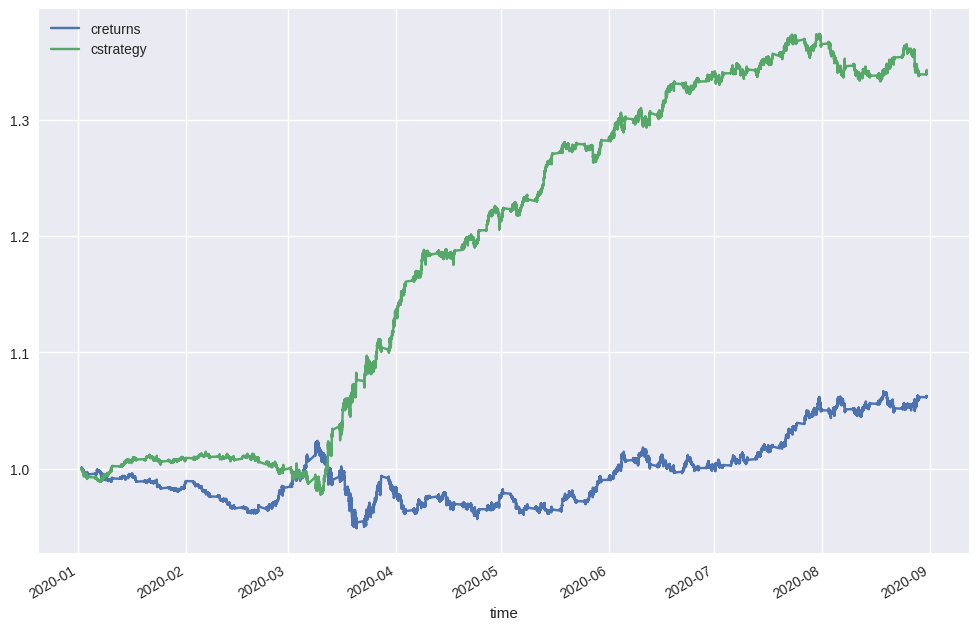

In [83]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [84]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [85]:
data.trades.value_counts()

trades
0.0    30748
2.0    18613
Name: count, dtype: int64

In [86]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred,strategy,creturns,cstrategy,trades
time,,,,,,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.110687,0.360840,0.944784,0.001578,-0.335287,1.0,0.000004,1.000004,1.000004,0.0
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.024037,-0.110700,0.360846,0.944788,0.001591,-1.0,-0.000031,1.000036,0.999973,2.0
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.158760,0.024023,-0.110695,0.360850,0.944795,-1.0,0.000004,1.000031,0.999978,0.0
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.020871,0.158745,0.024028,-0.110692,0.360860,-1.0,0.000031,1.000000,1.000009,0.0
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.155595,-0.020884,0.158750,0.024032,-0.110678,1.0,0.000357,1.000357,1.000366,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.463573,1.502901,0.234215,0.001578,-0.759734,1.0,-0.000080,1.061863,1.342305,2.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.400178,-0.463585,1.502908,0.234219,0.001591,1.0,0.000290,1.062170,1.342694,0.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,1.460454,-0.400189,-0.463580,1.502911,0.234231,-1.0,-0.000231,1.062416,1.342384,2.0


## Out-Sample Forward Testing

In [87]:
data = pd.read_csv("test_set.csv", parse_dates = ["time"], index_col = "time")

In [88]:
data

,price
time,
2020-01-01 22:00:00+00:00,1.121325
2020-01-01 22:05:00+00:00,1.121250
2020-01-01 22:10:00+00:00,1.121250
2020-01-01 22:15:00+00:00,1.121460
2020-01-01 22:20:00+00:00,1.121540
...,...
2020-08-30 23:35:00+00:00,1.190895
2020-08-30 23:40:00+00:00,1.191240
2020-08-30 23:45:00+00:00,1.191515


In [89]:
data["returns"] = np.log(data.div(data.shift(1)))

In [90]:
data["direction"] = np.sign(data.returns)

In [91]:
data

,price,returns,direction
time,,,
2020-01-01 22:00:00+00:00,1.121325,NaN,NaN
2020-01-01 22:05:00+00:00,1.121250,-0.000067,-1.0
2020-01-01 22:10:00+00:00,1.121250,0.000000,0.0
2020-01-01 22:15:00+00:00,1.121460,0.000187,1.0
2020-01-01 22:20:00+00:00,1.121540,0.000071,1.0
...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0


In [92]:
lags = 5

In [93]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [94]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.000022,0.000071,0.000187,0.000000,-0.000067
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.000004,-0.000022,0.000071,0.000187,0.000000
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.000031,0.000004,-0.000022,0.000071,0.000187
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.000004,0.000031,0.000004,-0.000022,0.000071
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.000031,-0.000004,0.000031,0.000004,-0.000022
...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.000092,0.000298,0.000046,0.000000,-0.000151
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.000080,-0.000092,0.000298,0.000046,0.000000
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,0.000290,-0.000080,-0.000092,0.000298,0.000046


+++++++++++++++++++++++++++++++++++

__Scaling/Standardizing (NEW)__

using __training set parameters__ (mean/std)!!! Avoid Data Leakage!

In [95]:
means # training set

lag1   -3.142659e-07
lag2   -3.115388e-07
lag3   -3.125681e-07
lag4   -3.132864e-07
lag5   -3.159474e-07
dtype: float64

In [96]:
stand_devs # training set

lag1    0.000199
lag2    0.000199
lag3    0.000199
lag4    0.000199
lag5    0.000199
dtype: float64

In [97]:
data[cols] = (data[cols]-means) / stand_devs
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.110687,0.360840,0.944784,0.001578,-0.335287
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.024037,-0.110700,0.360846,0.944788,0.001591
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.158760,0.024023,-0.110695,0.360850,0.944795
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.020871,0.158745,0.024028,-0.110692,0.360860
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.155595,-0.020884,0.158750,0.024032,-0.110678
...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.463573,1.502901,0.234215,0.001578,-0.759734
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.400178,-0.463585,1.502908,0.234219,0.001591
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,1.460454,-0.400189,-0.463580,1.502911,0.234231


++++++++++++++++++++++++++++++++++

In [98]:
data["pred"] = lm.predict(data[cols])

In [99]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.110687,0.360840,0.944784,0.001578,-0.335287,1.0
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.024037,-0.110700,0.360846,0.944788,0.001591,-1.0
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.158760,0.024023,-0.110695,0.360850,0.944795,-1.0
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.020871,0.158745,0.024028,-0.110692,0.360860,-1.0
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.155595,-0.020884,0.158750,0.024032,-0.110678,1.0
...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.463573,1.502901,0.234215,0.001578,-0.759734,1.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.400178,-0.463585,1.502908,0.234219,0.001591,1.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,1.460454,-0.400189,-0.463580,1.502911,0.234231,-1.0


In [100]:
data.pred.value_counts()

pred
 1.0    26306
-1.0    23055
Name: count, dtype: int64

In [101]:
hits = np.sign(data.direction * data.pred).value_counts()

In [102]:
hits

 1.0    25117
-1.0    23632
 0.0      612
Name: count, dtype: int64

In [103]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5088430137152813

In [104]:
data["strategy"] = data.pred * data.returns

In [105]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

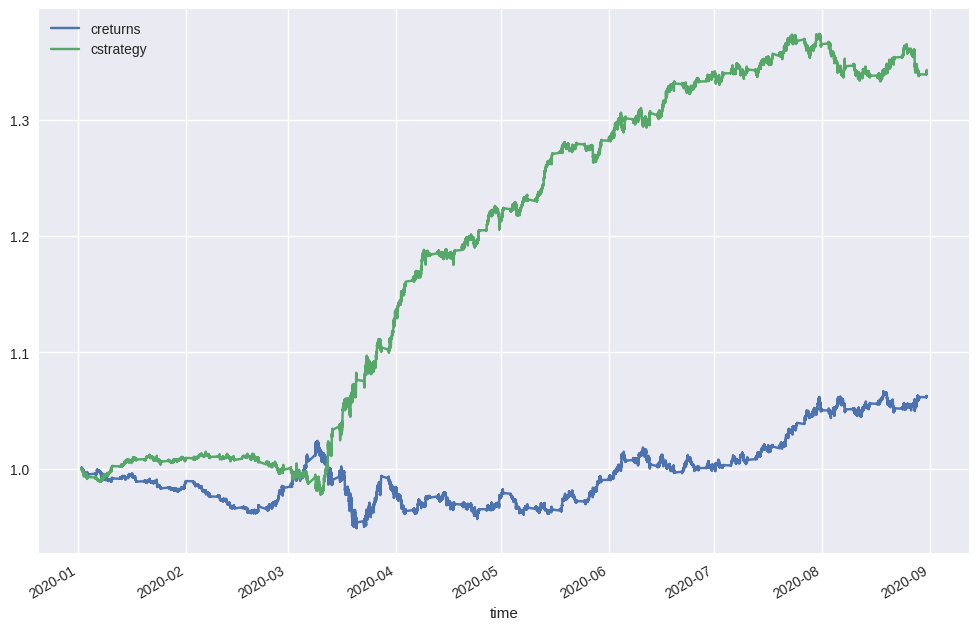

In [106]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [107]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [108]:
data.trades.value_counts()

trades
0.0    30748
2.0    18613
Name: count, dtype: int64

In [109]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred,strategy,creturns,cstrategy,trades
time,,,,,,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.110687,0.360840,0.944784,0.001578,-0.335287,1.0,0.000004,1.000004,1.000004,0.0
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.024037,-0.110700,0.360846,0.944788,0.001591,-1.0,-0.000031,1.000036,0.999973,2.0
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.158760,0.024023,-0.110695,0.360850,0.944795,-1.0,0.000004,1.000031,0.999978,0.0
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.020871,0.158745,0.024028,-0.110692,0.360860,-1.0,0.000031,1.000000,1.000009,0.0
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.155595,-0.020884,0.158750,0.024032,-0.110678,1.0,0.000357,1.000357,1.000366,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.463573,1.502901,0.234215,0.001578,-0.759734,1.0,-0.000080,1.061863,1.342305,2.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.400178,-0.463585,1.502908,0.234219,0.001591,1.0,0.000290,1.062170,1.342694,0.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,1.460454,-0.400189,-0.463580,1.502911,0.234231,-1.0,-0.000231,1.062416,1.342384,2.0
